In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = np.loadtxt('input/mfeat-pix.txt')

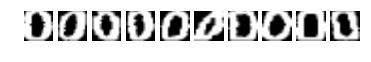

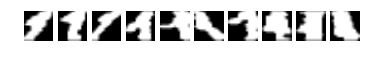

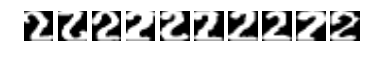

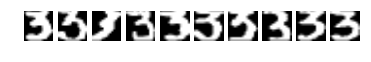

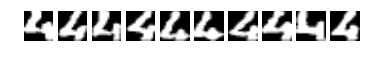

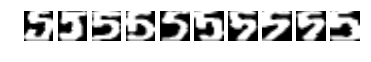

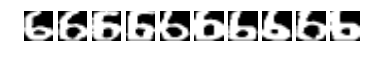

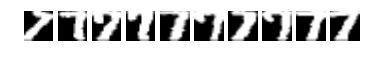

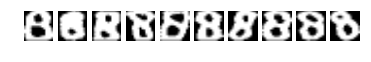

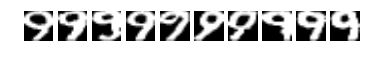

In [3]:
def plot_digits(digits):
    for i in range(10):
        for j in range(10):
            plt.subplot(1, 10, j + 1)
            digit = digits[j + 200 * i, ].reshape(16, 15)
            plt.imshow(digit, cmap='gray')
            plt.axis('off')
        plt.show()
plot_digits(digits = X)

In [3]:
class KMeans:
    def __init__(self, n_clusters=10, max_iter=100, random_state=42):
        if n_clusters <= 0:
            raise ValueError("n_cluster cannot be less or equal to 0.")
        self.n_cluster = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
    
    def fit(self, X, normalize=True):
        """
        Train the model using KMeans
        """
        self._X_rows = X.shape[0]
        self._X_cols = X.shape[1]
        if self._X_rows == self.n_cluster: # deal with the case when number of rows is equal to number of clusters 
            self.labels = np.random.choice(self.n_cluster, self._X_rows, replace=False)
        else:
            self.labels = np.random.choice(self.n_cluster, self._X_rows)
        
        if normalize:
            X = (X - np.min(X)) / (np.max(X) - np.min(X))
        
        self.centers = np.zeros((self.n_cluster, self._X_cols))
        
        self.iter = 0
        while self.iter <  self.max_iter:
            for i in range(self.n_cluster):
                X_i = X[self.labels == i, ]
                # if X is a vector, set center[i, 0] to X
                if X_i.ndim == 1:
                    self.centers[i, ] = X_i
                # if X is empty, set center[i, ] to a zero vector
                elif X_i.size == 0:
                    self.centers[i, ] = np.zeros(self.X_cols_)
                else:
                    self.centers[i, ] = np.mean(X_i, axis=0)
            
            # decide new groups
            new_labels = np.zeros(self._X_rows)
            for i in range(self._X_rows):
                dist = np.sum(np.square((X[i] - self.centers)), axis=1)
                new_labels[i] = np.argmin(dist)
            
            # termination condition
            if np.array_equal(self.labels, new_labels):
                break
            else:
                self.labels = new_labels
                self.iter += 1
    
    def plot_centers(self, index=None):
        """
        Plot the centers
        """
        if index is None:
            index = [i for i in range(self.centers.shape[0])]
            
        for i in index:
            center_i = self.centers[i]
            if not np.all(center_i==0):
                center_i = center_i.reshape(16, 15)
                plt.imshow(center_i, cmap='gray')
            plt.show()

In [5]:
X = X[0:200, ]

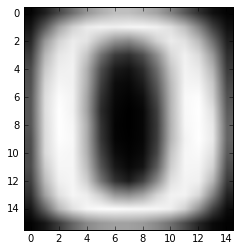

In [6]:
cluster_1 = KMeans(n_clusters=1)
cluster_1.fit(X)
cluster_1.plot_centers()

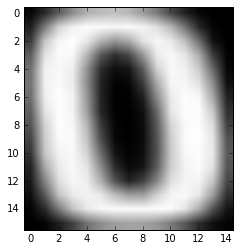

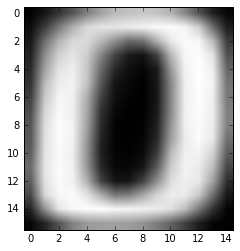

In [7]:
cluster_2 = KMeans(n_clusters=2)
cluster_2.fit(X)
cluster_2.plot_centers()

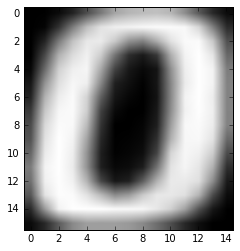

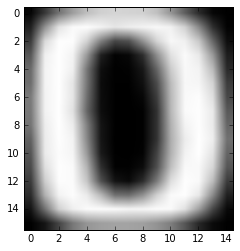

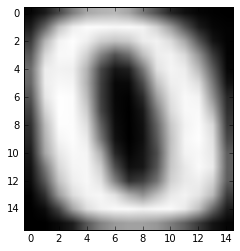

In [8]:
cluster_3 = KMeans(n_clusters=3)
cluster_3.fit(X)
cluster_3.plot_centers()

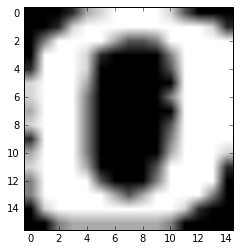

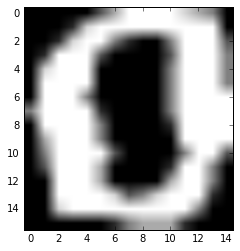

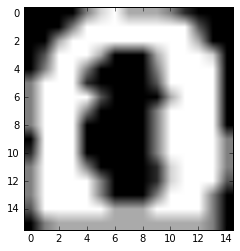

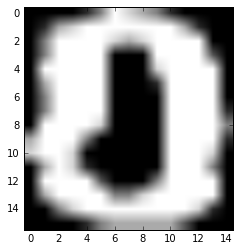

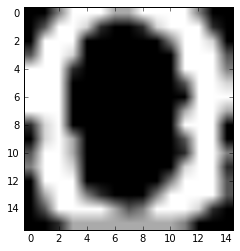

In [9]:
cluster_200 = KMeans(n_clusters=200)
cluster_200.fit(X)
cluster_200.plot_centers(index=[0, 1, 2, 3, 4])